In [90]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy
import math

In [91]:
def average_clustering(G, trials=1000):
    """Estimates the average clustering coefficient of G.

    The local clustering of each node in `G` is the
    fraction of triangles that actually exist over
    all possible triangles in its neighborhood.
    The average clustering coefficient of a graph
    `G` is the mean of local clustering.

    This function finds an approximate average
    clustering coefficient for G by repeating `n`
    times (defined in `trials`) the following
    experiment: choose a node at random, choose
    two of its neighbors at random, and check if
    they are connected. The approximate coefficient
    is the fraction of triangles found over the
    number of trials [1]_.

    Parameters
    ----------
    G : NetworkX graph

    trials : integer
        Number of trials to perform (default 1000).

    Returns
    -------
    c : float
        Approximated average clustering coefficient.



    """
    n = len(G)
    triangles = 0
    nodes = G.nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        nbrs = list(G[nodes[i]])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in G[v]:
            triangles += 1
    return triangles / float(trials)

In [92]:
# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

G.number_of_nodes()
G.number_of_edges()

c = nx.average_clustering(G)

In [93]:
cc = nx.clustering(G)
#for key, value in cc.items():
#    if value != 0:
#        print(key, ": ", value)

values = [0 for i in range(10)]

for key, value in cc.items():
    temp = value
    temp *= 10
    if temp == 10:
        values[9] += 1
        continue
    values[math.trunc(temp)] += 1

values

[1102, 40, 5, 22, 0, 0, 0, 0, 0, 5]

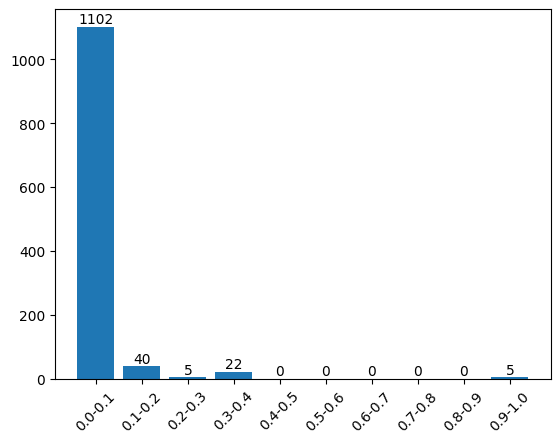

In [94]:
x = []
for i in range(10):
    temp = i / 10
    labelX = str(temp) + "-" + str(round(temp+0.1, 2))
    x.append(labelX)
plt.bar(x, values, label=values)
for i in range(len(values)):
    plt.text(i, values[i] + 10, values[i], ha="center")
plt.xticks(rotation=45)
plt.show()